# ROC_AUC_SCORE TEST

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

##########데이터 로드

x_data = [
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
]
y_data = [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]

labels = ['fail', 'pass']

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

##########모델 생성

model = LogisticRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

y_predict = model.predict(x_test)



In [2]:
print(x_test, y_test)

print(y_predict)

[[9, 2], [6, 12], [2, 5], [3, 4]] [1, 1, 0, 0]
[1 1 0 0]


In [3]:
model.decision_function(x_test)

array([ 2.81096309,  6.32499112, -1.19102536, -0.96220885])

In [4]:
model.predict_proba(x_test)[:, 1]

array([0.94326538, 0.99821222, 0.2330756 , 0.27643616])

In [5]:
metrics.roc_auc_score(y_test, model.decision_function(x_test))

1.0

In [7]:
metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

1.0

In [11]:
metrics.roc_auc_score(y_test, y_predict)

1.0

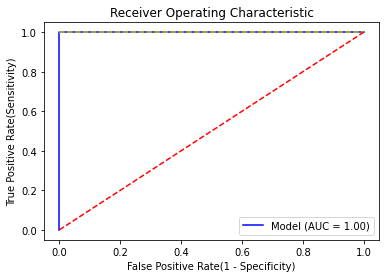

In [6]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(x_test))
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

#roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(x_test))
#roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()